# **Color Identification using Machine Learning**
In this notebook, I have used machine learning algorithm, KMeans, to extract colors from a give image. I will use OpenCV2 for image manipulation, apply KMeans to identify the major colors and then plot the information using Matplotlib.

# **Import libraries**
Let's first import necessary libraries. We need sklearn for KMeans algorithm, matplotlib.pyplot for plotting graphs, numpy to work with arrays, cv2 to work with image data, collections to use Counter to count values, rgb2lab to convert RGB values to calculate similarity between colors.

In [100]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

# **Working with OpenCV**
Let's first read a sample image and understand basic operations that we can do on it.

In [101]:
os.chdir("/content/Images")

In [102]:
os.getcwd()

'/content/Images'

In [103]:
os.listdir("/content/Images")

['wp.jpg', '.ipynb_checkpoints', 'wp5.png', 'wp6.jpg', 'wp1.jpg', 'wp2.jpg']

The type of this input is <class 'numpy.ndarray'>
Shape: (175, 250, 3)


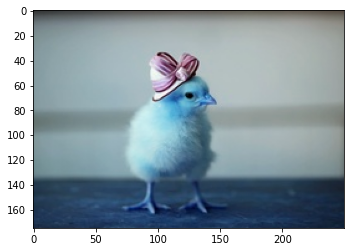

In [104]:
image = cv2.imread('/content/Images/wp.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

# **BGR to RGB Image Conversion**

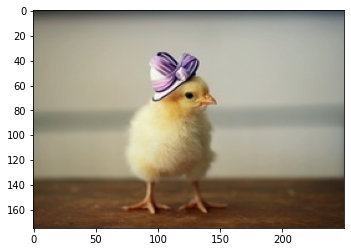

In [105]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

The image can also be converted to grayscale if needed


# **BGR to Grayscale Image Conversion**

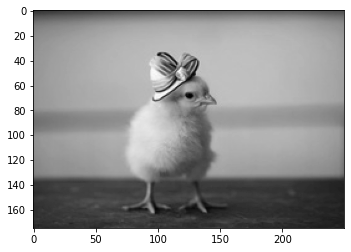

In [106]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

We might want to resize the image to a certain size whenever the images are huge or when we are working with multiple images of different dimensions.

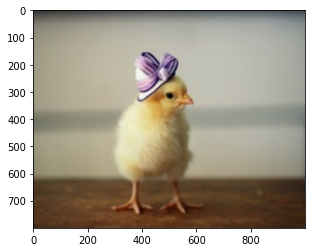

In [107]:
resized_image = cv2.resize(image, (1000, 800))
plt.imshow(resized_image)

[array([187.56582507, 153.84235047,  91.98797716]),
 array([187.94290607, 185.34821474, 170.80142135]),
 array([73.39929314, 46.32852616, 27.41343029]),
 array([147.60211064, 145.23578967, 130.12314102]),
 array([115.02913676, 105.58780238,  91.73028895]),
 array([230.30910722, 222.1756393 , 186.20222073]),
 array([99.01241944, 69.56534919, 42.41752259]),
 array([170.65059846, 166.91573247, 149.15415129])]

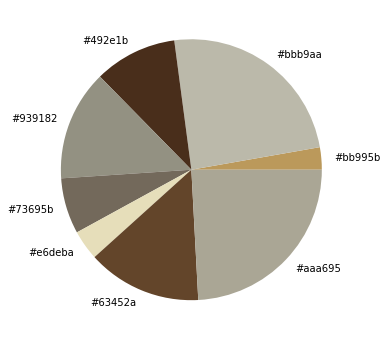

In [108]:
get_colors(get_image('/content/Images/wp.jpg'), 8, True)

# ***Color Identification***
Not that we know a bit about OpenCV, let's start identifying colors from an image.

First, we will define a function that can give us the hex values of our the colors that we will identify.

## **RBG to HEX Conversion Function**

In [109]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

KMeans expects flattened array as input during its fit method. Thus, we need to reshape the image using numpy. Then, we can apply KMeans to first fit and then predict on the image to get the results. Then, the cluster colors are identified an arranged in the correct order. We plot the colors as a pie chart.

I have combined all the steps in two method.

## **Function For Fetching Image in RGB Colorspace**

In [110]:
image_path = os.listdir('/content/Images')

In [111]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

## **Fetching Colors From Images**

In [112]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

# ***Search images using Color***
From the model above, we can extract the major colors. This create the opportunity to search for images based on certain colors. We can select a color and if it's hex matches or is close to the hex of the major colors of the image, we say it's a match.

We first get all the images and store them in the images variable.

## **Image Dict For Further Color Searching**

In [113]:
Images = '/content/Images'
COLORS = {
    'Blue' : [0, 0, 128],
    'Red' : [192, 0, 0]
}
images = []

for file in os.listdir("/content/Images"):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(Images, file)))

## **List Of Several Images**

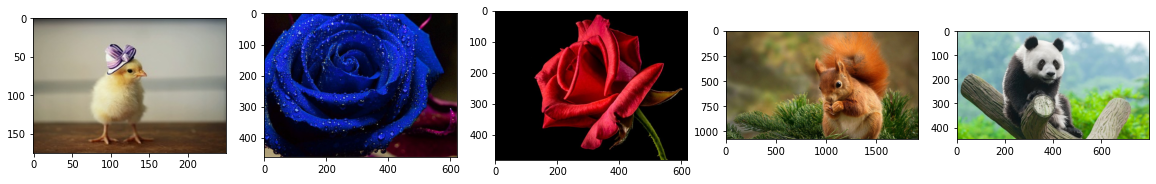

In [114]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])


## **Function For Matching Image By Different Colors**

In [115]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

## **Function For Showing Selected Images**

In [116]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

## **Search Images Which Contain Blue Color**

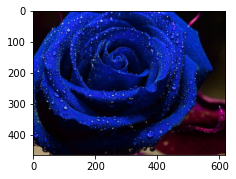

In [117]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['Blue'], 60, 5)

## **Search Images Which Contain Red Color**

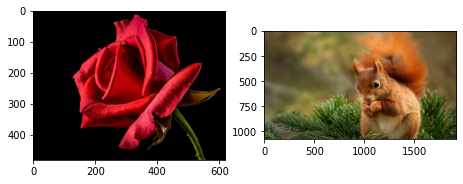

In [118]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['Red'], 60, 5)

## **Applying Some OpenCV functions**

The type of this input is <class 'numpy.ndarray'>
Shape: (175, 250, 3)


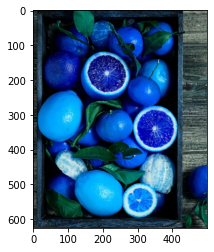

In [120]:
image1 = cv2.imread('/content/drive/MyDrive/images/orange.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image1)

## **BGR to RGB Image Conversion**

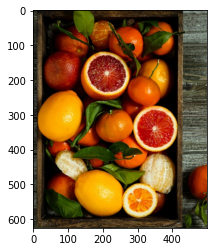

In [121]:
image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image2)

## **Get All Colors From Orange Image**

[array([33.92476416, 19.43243138,  6.14950115]),
 array([228.3272401 , 114.73158734,   3.68086945]),
 array([131.82861988,  36.34366862,   6.9832859 ]),
 array([194.72076707, 121.48175865,  67.95299345]),
 array([ 86.40160358, 101.46598279,   9.3751916 ]),
 array([77.27093367, 67.72018801, 45.46347125]),
 array([102.91322751,  97.85668934,  73.15411943]),
 array([190.41917163,  81.26949716,   8.02569608]),
 array([234.61198774, 217.61698263, 170.59053241]),
 array([7.45342629, 3.60391935, 1.3089316 ]),
 array([247.76577981, 170.92368919,   7.72436825]),
 array([50.00110128, 49.77517641, 17.49928621]),
 array([126.16382525, 133.37533298, 117.09030368]),
 array([85.5207421 , 12.70746079,  2.18241898]),
 array([228.44416632, 188.67793075, 106.69962453]),
 array([175.1832035 ,  39.90802241,   7.41178078])]

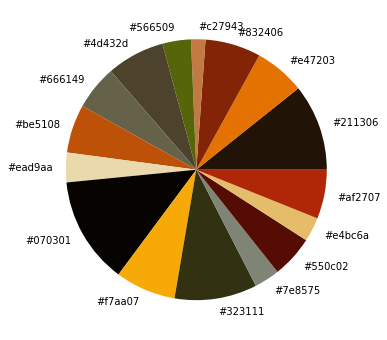

In [ ]:
get_colors(get_image('/content/drive/MyDrive/images/orange.jpg'),16 , True)